In [1]:
# 3 moving average crossover strategy

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
plt.style.use('fivethirtyeight')

In [3]:
#load the data
data=pd.DataFrame()
data=wb.DataReader('RELIANCE.NS',data_source='yahoo',start='2020-06-1')

In [4]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-01,1538.349976,1475.949951,1480.000000,1520.349976,18434012.0,1514.662720
2020-06-02,1540.000000,1520.800049,1526.000000,1535.699951,10224049.0,1529.955200
2020-06-03,1560.000000,1533.349976,1545.000000,1541.650024,11713461.0,1535.883057
2020-06-04,1589.500000,1541.000000,1544.000000,1579.800049,15784379.0,1573.890381
2020-06-05,1618.000000,1573.699951,1595.000000,1581.699951,15264885.0,1575.783203
...,...,...,...,...,...,...
2020-11-26,1965.000000,1930.050049,1953.050049,1952.599976,11924527.0,1952.599976
2020-11-27,1956.099976,1921.400024,1940.500000,1929.800049,21845931.0,1929.800049
2020-12-01,1966.250000,1930.050049,1940.349976,1954.900024,9114939.0,1954.900024


C:\Users\dixit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


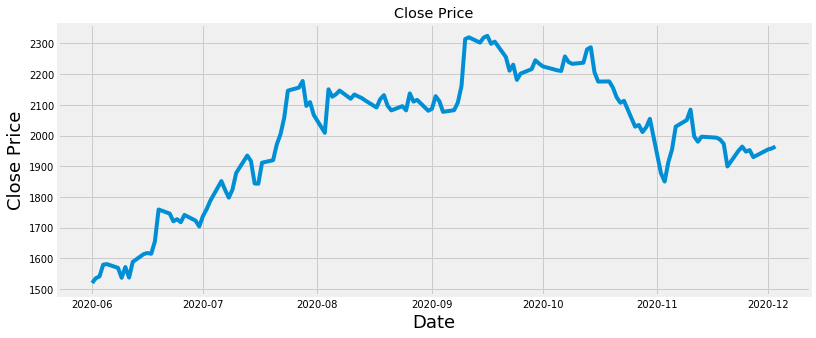

In [5]:
plt.figure(figsize=(12,5))
plt.title('Close Price')
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [6]:
# Calculate the three moving average
# Short EMA
ShortEMA=data.Close.ewm(span=5,adjust=False).mean()
MedEMA=data.Close.ewm(span=30,adjust=False).mean()
LongEMA=data.Close.ewm(span=50,adjust=False).mean()

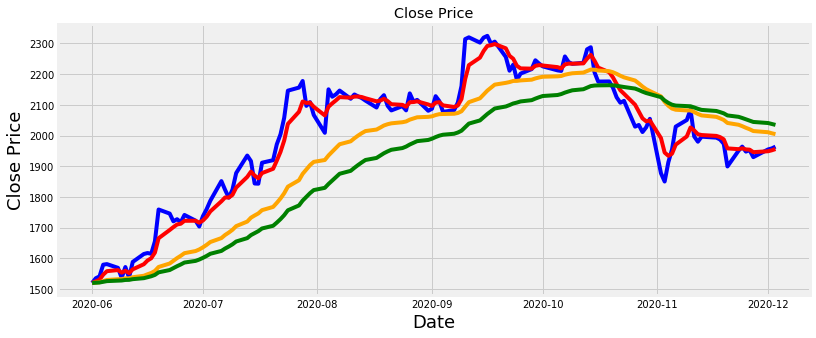

In [7]:
# visualize the closing price and EMA
plt.figure(figsize=(12,5))
plt.title('Close Price')
plt.plot(data['Close'],label='Close Price',color='blue')
plt.plot(ShortEMA,label='ShortEMA',color='red')
plt.plot(MedEMA,label='MedEMA',color='orange')
plt.plot(LongEMA,label='LongEMA',color='green')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [8]:
# Add expoMA to data
data['Short']=ShortEMA
data['Middle']=MedEMA
data['Long']=LongEMA
data


,High,Low,Open,Close,Volume,Adj Close,Short,Middle,Long
Date,,,,,,,,,
2020-06-01,1538.349976,1475.949951,1480.000000,1520.349976,18434012.0,1514.662720,1520.349976,1520.349976,1520.349976
2020-06-02,1540.000000,1520.800049,1526.000000,1535.699951,10224049.0,1529.955200,1525.466634,1521.340297,1520.951935
2020-06-03,1560.000000,1533.349976,1545.000000,1541.650024,11713461.0,1535.883057,1530.861098,1522.650602,1521.763625
2020-06-04,1589.500000,1541.000000,1544.000000,1579.800049,15784379.0,1573.890381,1547.174081,1526.337663,1524.039563
2020-06-05,1618.000000,1573.699951,1595.000000,1581.699951,15264885.0,1575.783203,1558.682705,1529.909423,1526.300755
...,...,...,...,...,...,...,...,...,...
2020-11-26,1965.000000,1930.050049,1953.050049,1952.599976,11924527.0,1952.599976,1954.170752,2020.600569,2049.024423
2020-11-27,1956.099976,1921.400024,1940.500000,1929.800049,21845931.0,1929.800049,1946.047185,2014.742471,2044.348958
2020-12-01,1966.250000,1930.050049,1940.349976,1954.900024,9114939.0,1954.900024,1948.998131,2010.881668,2040.841156


In [9]:
# Trading strategy Create a function to buy and  sell nifty
def buy_sell_function(data):
    buy_list=[]  # at what prices to buy 
    sell_list=[]
    flag_long=False
    flag_short=False
    for i in range(0,len(data)):
        if data['Middle'][i]<data['Long'][i]and data['Short'][i]<data['Middle'][i] and flag_long==False and flag_short==False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_short=True
        elif flag_short==True and data['Short'][i]>data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_short=False
        elif data['Middle'][i]>data['Long'][i]and data['Short'][i]>data['Middle'][i] and flag_long==False and flag_short==False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_long=True
        elif flag_long==True and data['Short'][i]<data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_long=False
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
    return (buy_list,sell_list)

In [10]:
# Add buy sell signal
data['Buy']=buy_sell_function(data)[0]
data['Sell']=buy_sell_function(data)[1]


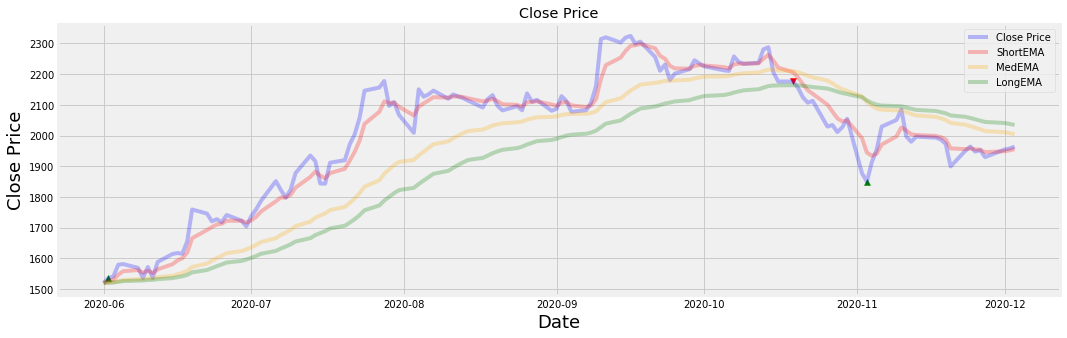

In [11]:
# Visual buy sell signal on graph
plt.figure(figsize=(16,5))
plt.title('Close Price')
plt.plot(data['Close'],label='Close Price',color='blue',alpha=0.25)
plt.plot(ShortEMA,label='ShortEMA',color='red',alpha=0.25)
plt.plot(MedEMA,label='MedEMA',color='orange',alpha=0.25)
plt.plot(LongEMA,label='LongEMA',color='green',alpha=0.25)
plt.scatter(data.index,data['Buy'],color='green',marker='^',alpha=1)
plt.scatter(data.index,data['Sell'],color='red',marker='v',alpha=1)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.legend()
plt.show()